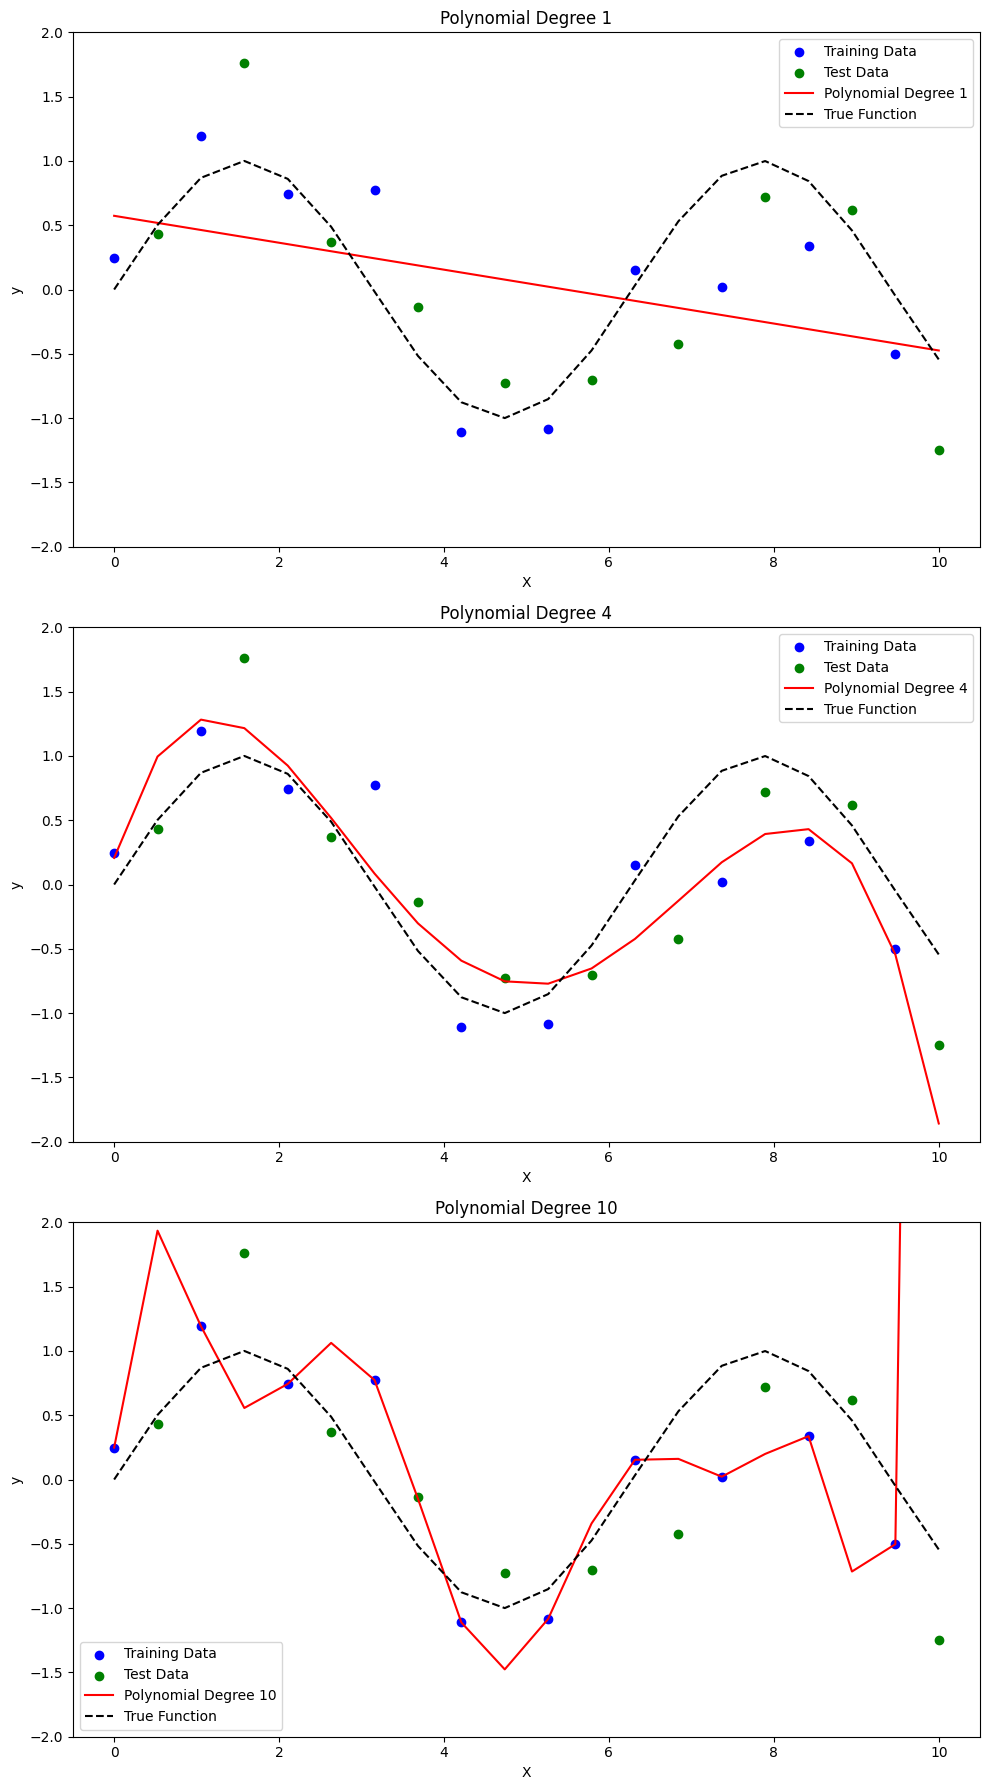

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Set a seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = np.linspace(0, 10, 20)
# True function is sine wave
y_true = np.sin(X)
# Add some noise to simulate real-world data
y = y_true + np.random.normal(scale=0.5, size=X.shape)

# Reshape X for sklearn
X = X[:, np.newaxis]

# Split data into training and test sets
X_train = X[::2]  # Even indices
y_train = y[::2]
X_test = X[1::2]  # Odd indices
y_test = y[1::2]

# Degrees of polynomials to fit
degrees = [1, 4, 10]

plt.figure(figsize=(10, 18))

for i, degree in enumerate(degrees):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)
    X_poly_plot = poly_features.transform(X)

    # Fit the model
    model = LinearRegression()
    model.fit(X_poly_train, y_train)


    # Predictions
    y_poly_pred = model.predict(X_poly_plot)

    # Plotting
    plt.subplot(3, 1, i + 1)
    plt.scatter(X_train, y_train, label='Training Data', color='blue')
    plt.scatter(X_test, y_test, label='Test Data', color='green')
    plt.plot(X, y_poly_pred, label=f'Polynomial Degree {degree}', color='red')
    plt.plot(X, y_true, label='True Function', color='black', linestyle='dashed')
    plt.title(f'Polynomial Degree {degree}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    # set the y range to be the same for all plots and equal to 2
    plt.ylim(-2, 2)

plt.tight_layout()
plt.show()
